# Homework III - Aprendizagem

**Afonso da Conceição Ribeiro**, 102763
<br>
**Miguel Gomes Marques Pessanha de Almeida**, 103493

## I. Pen-and-paper [12v]

**For questions in this group, show your numerical results with 5 decimals or scientific notation. <br>
Hint: we highly recommend the use of `numpy` (e.g., `linalg.pinv` for inverse) or other programmatic facilities to support the calculus involved in both questions (1) and (2).**

In [ ]:
import numpy as np

### 1)

**Consider the problem of learning a regression model from 4 bivariate observations**
$
\left\{
\begin{bmatrix} 0.7 \\ -0.3 \end{bmatrix},
\begin{bmatrix} 0.4 \\ 0.5 \end{bmatrix},
\begin{bmatrix} -0.2 \\ 0.8 \end{bmatrix},
\begin{bmatrix} -0.4 \\ 0.3 \end{bmatrix}
\right\}
$
**with targets**
$\left( 0.8,0.6,0.3,0.3 \right)$
**.**

#### a. [4v]

**Given the radial basis function,**
$
\phi_j(x) = exp \left( -\frac{\left\| \textbf{x}-\textbf{c}_j \right\|^2}{2} \right)
$
**, that transforms the original space onto a new space characterized by the similarity of the original observations to the following data points,**
$
\left\{
\textbf{c}_1 = \begin{bmatrix} 0 \\ 0 \end{bmatrix},
\textbf{c}_2 = \begin{bmatrix} 1 \\ -1 \end{bmatrix},
\textbf{c}_3 = \begin{bmatrix} -1 \\ 1 \end{bmatrix}
\right\}
$
**. <br> Learn the Ridge regression ($l_2$ regularization) using the closed solution with $λ = 0.1$.**

In [ ]:
x = np.array([(0.7, -0.3), (0.4, 0.5), (-0.2, 0.8), (-0.4, 0.3)])
c = np.array([(0, 0), (1, -1), (-1, 1)])
z = np.array([0.8, 0.6, 0.3, 0.3])
λ = 0.1

def phi(x, c):
    return np.exp(-(np.linalg.norm(x - c) ** 2) / 2)

# Initialize an empty matrix Phi with the same number of rows as x and the same number of columns as c
num_x, num_c = x.shape[0], c.shape[0]
Phi = np.zeros((x.shape[0], c.shape[0]))

# Calculate the values of Phi using the given formula
for i in range(num_x):
    for j in range(num_c):
        Phi[i, j] = phi(x[i], c[j])

# Add biases
Phi = np.hstack((np.ones((num_x, 1)), Phi))

# Calculate w
w = np.linalg.inv(Phi.T @ Phi + λ * np.eye(Phi.shape[1])) @ Phi.T @ z

print("w =", w)

w = [ 0.33914267  0.19945264  0.40096085 -0.29599936]


$$
\textbf{x} = \begin{bmatrix} 0.7 & -0.3 \\ 0.4 & 0.5 \\ -0.2 & 0.8 \\ -0.4 & 0.3 \end{bmatrix}, \quad
\textbf{c} = \begin{bmatrix} 0 & 0 \\ 1 & -1 \\ -1 & 1 \end{bmatrix}, \quad
\textbf{z} = \begin{bmatrix} 0.8 \\ 0.6 \\ 0.3 \\ 0.3 \end{bmatrix}, \quad
\lambda = 0.1
$$

$$
\phi_j(\textbf{x}_i) = \exp\left(-\frac{\|x_i - c_j\|^2}{2}\right) \qquad \phi_0(\textbf{x}_i) = 1,  \forall{i}
$$

$$
\Phi_{i,j} = \phi_{j-1}(\textbf{x}_i) \\
$$

$$
\Phi =
	\begin{bmatrix}
		1 & \phi_1(\textbf{x}_1) & \phi_2(\textbf{x}_1) & \phi_3(\textbf{x}_1) \\
		1 & \phi_1(\textbf{x}_2) & \phi_2(\textbf{x}_2) & \phi_3(\textbf{x}_2) \\
		1 & \phi_1(\textbf{x}_3) & \phi_2(\textbf{x}_3) & \phi_3(\textbf{x}_3) \\
		1 & \phi_1(\textbf{x}_4) & \phi_2(\textbf{x}_4) & \phi_3(\textbf{x}_4) \\
	\end{bmatrix}
	=
	\begin{bmatrix}
		1 & 0.74826357 & 0.74826357 & 0.10126646 \\
		1 & 0.81464732 & 0.27117254 & 0.33121088 \\
		1 & 0.71177032 & 0.09632764 & 0.71177032 \\
		1 & 0.88249690 & 0.16121764 & 0.65376979
	\end{bmatrix}
$$

$$
\Phi^T =
	\begin{bmatrix}
		1          & 1          & 1          & 1          \\
		0.74826357 & 0.81464732 & 0.71177032 & 0.88249690 \\
		0.74826357 & 0.27117254 & 0.09632764 & 0.16121764 \\
		0.10126646 & 0.33121088 & 0.71177032 & 0.65376979
	\end{bmatrix}
$$

$$
(\Phi^T \Phi + \lambda \textbf{I})^{-1} \Phi^T =
	\begin{bmatrix}
		 0.14104789 &  0.35022196 &  0.35575370 & -0.30184975 \\
		-0.09064104 &  0.43822869 & -0.50360629 &  0.53370047 \\
		 0.99394091 & -0.50614900 & -0.13690469 & -0.16477025 \\
		-0.31221638 & -0.65245932 &  0.72647200 &  0.42435912
	\end{bmatrix}
$$

$$
\textbf{w} =
	(\Phi^T \Phi + \lambda I)^{-1} \Phi^T \textbf{z}
	=
	\begin{bmatrix}
		 0.14104789 &  0.35022196 &  0.3557537  & -0.30184975 \\
		-0.09064104 &  0.43822869 & -0.50360629 &  0.53370047 \\
		 0.99394091 & -0.50614900 & -0.13690469 & -0.16477025 \\
		-0.31221638 & -0.65245932 &  0.72647200 &  0.42435912
	\end{bmatrix}
	\begin{bmatrix}
		0.8 \\ 0.6 \\ 0.3 \\ 0.3
	\end{bmatrix}
	=
	\begin{bmatrix}
	0.33914267 \\ 0.19945264 \\ 0.40096085 \\ -0.29599936
	\end{bmatrix}
$$

#### b. [2v]

**Compute the training RMSE for the learnt regression.**

In [ ]:
z_hat = Phi @ w

RMSE = np.sqrt(np.sum((z - z_hat) ** 2) / num_x)

print("RMSE =", RMSE)

RMSE = 0.06508238153393466


$$
\textbf{z} = \begin{bmatrix} 0.8 \\ 0.6 \\ 0.3 \\ 0.3 \end{bmatrix}
$$

$$
\hat{\textbf{z}} =
	\Phi \textbf{w}
	=
	\begin{bmatrix}
		1 & 0.74826357 & 0.74826357 & 0.10126646 \\
		1 & 0.81464732 & 0.27117254 & 0.33121088 \\
		1 & 0.71177032 & 0.09632764 & 0.71177032 \\
		1 & 0.88249690  & 0.16121764 & 0.65376979
	\end{bmatrix}
	\begin{bmatrix}
		0.33914267 \\ 0.19945264 \\ 0.40096085 \\ -0.29599936
	\end{bmatrix}
	=
	\begin{bmatrix}
		0.75843541 \\ 0.51231759 \\ 0.30904720 \\ 0.38628554
	\end{bmatrix}
$$

$$
\text{RMSE}(\hat{\textbf{z}}, \textbf{z})
=
\sqrt{\frac{1}{4} \sum_{i=1}^{4} (\textbf{z}_i - \hat{\textbf{z}}_i)^2}
=
0.06508238
$$

### 2) [6v]

**Consider a MLP classifier of three outcomes - A, B and C - characterized by the weights, <br>**

$
W^{[1]} =
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & 1 & 2 & 1 \\
1 & 1 & 1 & 1
\end{bmatrix},
$
$
b^{[1]} =
\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix},
$
$
W^{[2]} =
\begin{bmatrix}
1 & 4 & 1 \\
1 & 1 & 1
\end{bmatrix},
$
$
b^{[2]} =
\begin{bmatrix} 1 \\ 1 \end{bmatrix},
$
$
W^{[3]} =
\begin{bmatrix}
1 & 1 \\
3 & 1 \\
1 & 1
\end{bmatrix},
$
$
b^{[3]} =
\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
$

**<br> the activation**
$
f(x) = \frac{e^{0.5x-2} - e^{-0.5x+2}}{e^{0.5x-2} + e^{-0.5x+2}} = tanh(0.5x - 2)
$
**for every unit, and squared error loss**
$
\frac{1}{2}\left\| \textbf{z} - \hat{\textbf{z}} \right\|^2_2
$
**. Perform one batch gradient descent update (with learning rate $η=0.1$) for training observations**
$
\textbf{x}_1 = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}
$
**and**
$
\textbf{x}_2 = \begin{bmatrix} 1 \\ 0 \\ 0 \\ -1 \end{bmatrix}
$
**with targets B and A, respectively.**

In [ ]:
# Weights and biases
W1 = np.array([[1, 1, 1, 1], [1, 1, 2, 1], [1, 1, 1, 1]])
b1 = np.array([[1], [1], [1]])
W2 = np.array([[1, 4, 1], [1, 1, 1]])
b2 = np.array([[1], [1]])
W3 = np.array([[1, 1], [3, 1], [1, 1]])
b3 = np.array([[1], [1], [1]])

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

# Activation function
def f(x):
    return tanh(0.5*x - 2)

def f_(x):
    return (1 - f(x)**2) * 0.5

# Loss function
def E(x, t):
    return 0.5 * np.sum(np.linalg.norm(t - x) ** 2)

# Learning rate
η = 0.1

# Training observations and targets
x0_1 = np.array([[1], [1], [1], [1]])
x0_2 = np.array([[1], [0], [0], [-1]])
t_1 = np.array([[-1], [1], [-1]])
t_2 = np.array([[1], [-1], [-1]])

# Forward propagation
z1_1 = W1 @ x0_1 + b1
x1_1 = f(z1_1)
z2_1 = W2 @ x1_1 + b2
x2_1 = f(z2_1)
z3_1 = W3 @ x2_1 + b3
x3_1 = f(z3_1)
z1_2 = W1 @ x0_2 + b1
x1_2 = f(z1_2)
z2_2 = W2 @ x1_2 + b2
x2_2 = f(z2_2)
z3_2 = W3 @ x2_2 + b3
x3_2 = f(z3_2)

# Backward propagation
δ3_1 = (x3_1 - t_1) * f_(z3_1)
δ2_1 = W3.T @ δ3_1 * f_(z2_1)
δ1_1 = W2.T @ δ2_1 * f_(z1_1)
δ3_2 = (x3_2 - t_2) * f_(z3_2)
δ2_2 = W3.T @ δ3_2 * f_(z2_2)
δ1_2 = W2.T @ δ2_2 * f_(z1_2)

# Updates:
W1 = W1 - η * (δ1_1 @ x0_1.T + δ1_2 @ x0_2.T)
b1 = b1 - η * (δ1_1 + δ1_2)
W2 = W2 - η * (δ2_1 @ x1_1.T + δ2_2 @ x1_2.T)
b2 = b2 - η * (δ2_1 + δ2_2)
W3 = W3 - η * (δ3_1 @ x2_1.T + δ3_2 @ x2_2.T)
b3 = b3 - η * (δ3_1 + δ3_2)

print("W1 =", W1)
print("\nb1 =", b1)
print("\nW2 =", W2)
print("\nb2 =", b2)
print("\nW3 =", W3)
print("\nb3 =", b3)

W1 = [[1.0187207  1.01871904 1.01871904 1.01871737]
 [1.03358917 1.03358719 2.03358719 1.03358521]
 [1.0187207  1.01871904 1.01871904 1.01871737]]

b1 = [[1.0187207 ]
 [1.03358917]
 [1.0187207 ]]

W2 = [[1.01730444 4.02851932 1.01730444]
 [1.00467751 1.00771893 1.00467751]]

b2 = [[1.0374494 ]
 [1.01017306]]

W3 = [[0.99703633 0.9977484 ]
 [3.01431372 0.98168546]
 [0.99971282 1.00040847]]

b3 = [[1.00198208]
 [1.03177312]
 [0.99930442]]


##### Forward Propagation

$$
\textbf{z}_k^{[i]} = \textbf{W}^{[i]} \; \textbf{x}^{[i-1]} + \textbf{b}^{[i]} \qquad
\textbf{x}_k^{[i]} = tanh(0.5 \; \textbf{z}_k^{[i]} - 2)
$$

$$
\textbf{z}_1^{[1]} =
	\begin{bmatrix}
		1 & 1 & 1 & 1 \\
		1 & 1 & 2 & 1 \\
		1 & 1 & 1 & 1
	\end{bmatrix}
	\begin{bmatrix}
		1 \\ 1 \\ 1 \\ 1
	\end{bmatrix}
	+
	\begin{bmatrix}
		1 \\ 1 \\ 1
	\end{bmatrix}
	=
	\begin{bmatrix}
		5 \\ 6 \\ 5
	\end{bmatrix}
$$

$$
\textbf{x}_1^{[1]} =
	tanh \left(
	\begin{bmatrix}
		0.5 \cdot 5 - 2 \\
		0.5 \cdot 6 - 2 \\
		0.5 \cdot 5 - 2
	\end{bmatrix}
	\right)
	=
	\begin{bmatrix}
		0.46211716 \\ 0.76159416 \\ 0.46211716
	\end{bmatrix}
$$

$$
\textbf{z}_1^{[2]} =
	\begin{bmatrix}
		1 & 4 & 1 \\
		1 & 1 & 1
	\end{bmatrix}
	\begin{bmatrix}
		0.46211716 \\ 0.76159416 \\ 0.46211716
	\end{bmatrix}
	+
	\begin{bmatrix}
		1 \\ 1
	\end{bmatrix}
	=
	\begin{bmatrix}
		4.97061094 \\ 2.68582847
	\end{bmatrix}
$$

$$
\textbf{x}_1^{[2]} =
	tanh \left(
	\begin{bmatrix}
		0.5 \cdot 4.97061094 - 2 \\
		0.5 \cdot 2.68582847 - 2
	\end{bmatrix}
	\right)
	=
	\begin{bmatrix}
		0.45048251 \\ -0.57642073
	\end{bmatrix}
$$

$$
\textbf{z}_1^{[3]} =
	\begin{bmatrix}
		1 & 1 \\
		3 & 1 \\
		1 & 1
	\end{bmatrix}
	\begin{bmatrix}
		0.45048251 \\ -0.57642073
	\end{bmatrix}
	+
	\begin{bmatrix}
		1 \\ 1 \\ 1
	\end{bmatrix}
	=
	\begin{bmatrix}
		0.87406178 \\ 1.77502679 \\ 0.87406178
	\end{bmatrix}
$$

$$
\textbf{x}_1^{[3]} =
	tanh \left(
	\begin{bmatrix}
		0.5 \cdot 0.87406178 - 2 \\
		0.5 \cdot 1.77502679 - 2 \\
		0.5 \cdot 0.87406178 - 2
	\end{bmatrix}
	\right)
	=
	\begin{bmatrix}
		-0.91590016 \\ -0.80493961 \\ -0.91590016
	\end{bmatrix}
$$

$$
\textbf{z}_2^{[1]} =
	\begin{bmatrix}
		1 & 1 & 1 & 1 \\
		1 & 1 & 2 & 1 \\
		1 & 1 & 1 & 1
	\end{bmatrix}
	\begin{bmatrix}
		1 \\ 0 \\ 0 \\ -1
	\end{bmatrix}
	+
	\begin{bmatrix}
		1 \\ 1 \\ 1
	\end{bmatrix}
	=
	\begin{bmatrix}
		1 \\ 1 \\ 1
	\end{bmatrix}
$$

$$
\textbf{x}_2^{[1]} =
	tanh \left(
	\begin{bmatrix}
		0.5 \cdot 1 - 2 \\
		0.5 \cdot 1 - 2 \\
		0.5 \cdot 1 - 2
	\end{bmatrix}
	\right)
	=
	\begin{bmatrix}
		-0.90514825 \\ -0.90514825 \\ -0.90514825
	\end{bmatrix}
$$

$$
\textbf{z}_2^{[2]} =
	\begin{bmatrix}
		1 & 4 & 1 \\
		1 & 1 & 1
	\end{bmatrix}
	\begin{bmatrix}
		-0.90514825 \\ -0.90514825 \\ -0.90514825
	\end{bmatrix}
	+
	\begin{bmatrix}
		1 \\ 1
	\end{bmatrix}
	=
	\begin{bmatrix}
		-4.43088952 \\ -1.71544476
	\end{bmatrix}
$$

$$
\textbf{x}_2^{[2]} =
	tanh \left(
	\begin{bmatrix}
		0.5 \cdot -4.43088952 - 2 \\
		0.5 \cdot -1.71544476 - 2
	\end{bmatrix}
	\right)
	=
	\begin{bmatrix}
		-0.99956404 \\ -0.99343227
	\end{bmatrix}
$$

$$
\textbf{z}_2^{[3]} =
	\begin{bmatrix}
		1 & 1 \\
		3 & 1 \\
		1 & 1
	\end{bmatrix}
	\begin{bmatrix}
		-0.99956404 \\ -0.99343227
	\end{bmatrix}
	+
	\begin{bmatrix}
		1 \\ 1 \\ 1
	\end{bmatrix}
	=
	\begin{bmatrix}
		-0.99299631 \\ -2.99212439 \\ -0.99299631
	\end{bmatrix}
$$

$$
\textbf{x}_2^{[3]} =
	tanh \left(
	\begin{bmatrix}
		0.5 \cdot -0.99299631 - 2 \\
		0.5 \cdot -2.99212439 - 2 \\
		0.5 \cdot -0.99299631 - 2
	\end{bmatrix}
	\right)
	=
	\begin{bmatrix}
		-0.98652085 \\ -0.99816350 \\ -0.98652085
	\end{bmatrix}
$$

##### Backward Propagation

$$
\textbf{t}_1 = \begin{bmatrix} -1 \\ 1 \\ -1 \end{bmatrix}
\textbf{t}_2 = \begin{bmatrix} 1 \\ -1 \\ -1 \end{bmatrix}
$$

$$
E(\textbf{x}_k^{[3]}, \textbf{t}_i)
=
\frac{1}{2} \sum_{k=1}^{2} (\textbf{t}_{k} - \hat{\textbf{z}_k})^2
=
\frac{1}{2} \sum_{k=1}^{2} (\textbf{t}_{k} - \textbf{x}_k^{[3]})^2
$$

$$
\frac{\partial E(\textbf{x}_k^{[3]}, \textbf{t}_i)}{\partial \textbf{x}_k^{[i]}}
=
\frac{1}{2} \cdot 2 (\textbf{x}_k^{[3]} - \textbf{t}_k)
=
\textbf{x}_k^{[3]} - \textbf{t}_k
$$

$$
\frac{\partial \textbf{x}_k^{[i]}(\textbf{z}_k^{[i]})}{\partial \textbf{z}_k^{[i]}}
=
\frac{\partial \; tanh(0.5 \; \textbf{z}_k^{[i]} - 2)}{\partial \textbf{z}_k^{[i]}}
=
\frac{1}{2} \; (1 - tanh^2(0.5 \; \textbf{z}_k^{[i]} - 2))
$$

$$
\frac{\partial \textbf{z}_k^{[i]}(\textbf{W}^{[i]}, \textbf{b}^{[i]}, \textbf{x}_k^{[i-1]})}{\partial \textbf{W}^{[i]}}
=
\textbf{x}_k^{[i-1]}
$$

$$
\frac{\partial \textbf{z}_k^{[i]}(\textbf{W}^{[i]}, \textbf{b}^{[i]}, \textbf{x}_k^{[i-1]})}{\partial \textbf{b}^{[i]}}
= 1
$$

$$
\frac{\partial \textbf{z}_k^{[i]}(\textbf{W}^{[i]}, \textbf{b}^{[i]}, \textbf{x}_k^{[i-1]})}{\partial \textbf{x}_k^{[i-1]}}
=
\textbf{W}^{[i]}
$$

- Deltas:

$$
\delta_k^{[3]}
=
\frac{\partial E}{\partial \textbf{x}_k^{[3]}}
\circ
\frac{\partial \textbf{x}_k^{[3]}}{\partial \textbf{z}_k^{[3]}}
=
(\textbf{x}_k^{[3]} - \textbf{t}_k)
\circ
\frac{1}{2} \; (1 - tanh^2(0.5 \; \textbf{z}_k^{[3]} - 2))
$$

$$
\delta_k^{[l]}
=
\left( \frac{\partial \textbf{z}_k^{[l+1]}}{\partial \textbf{x}_k^{[l]}} \right) ^T
\cdot
\delta_k^{[l+1]}
\circ
\frac{\partial \textbf{x}_k^{[l]}}{\partial \textbf{z}_k^{[l]}}
=
{\textbf{W}^{[l+1]}}^T
\cdot
\delta_k^{[l+1]}
\circ
\frac{1}{2} \; (1 - tanh^2(0.5 \; \textbf{z}_k^{[l]} - 2)), \quad l \in \{1, 2\}
$$

$$
\delta_1^{[3]} =
	\left(
	\begin{bmatrix} -0.91590016 \\ -0.80493961 \\ -0.91590016 \end{bmatrix}
	-
	\begin{bmatrix} -1 \\ 1 \\ -1 \end{bmatrix}
	\right)
	\circ
	\begin{bmatrix} 0.08056345 \\ 0.17603611 \\ 0.08056345 \end{bmatrix}
	=
	\begin{bmatrix} 0.00677537 \\ -0.31773455 \\ 0.00677537 \end{bmatrix}
$$

$$
\delta_1^{[2]} =
	\begin{bmatrix}
		1 & 1 \\
		3 & 1 \\
		1 & 1
	\end{bmatrix}^T
	\cdot
	\begin{bmatrix} 0.00677537 \\ -0.31773455 \\ 0.00677537 \end{bmatrix}
	\circ
	\begin{bmatrix} 0.39853275 \\ 0.33386957 \end{bmatrix}
	=
	\begin{bmatrix} -0.37448246 \\ -0.10155772 \end{bmatrix}
$$

$$
\delta_1^{[1]} =
	\begin{bmatrix}
		1 & 4 & 1 \\
		1 & 1 & 1
	\end{bmatrix}^T
	\cdot
	\begin{bmatrix} -0.37448246 \\ -0.10155772 \end{bmatrix}
	\circ
	\begin{bmatrix} 0.39322387 \\ 0.20998717 \\ 0.39322387 \end{bmatrix}
	=
	\begin{bmatrix} -0.18719036 \\ -0.33587187 \\ -0.18719036 \end{bmatrix}
$$

$$
\delta_2^{[3]} =
	\left(
	\begin{bmatrix} -0.98652085 \\ -0.99816350 \\ -0.98652085 \end{bmatrix}
	-
	\begin{bmatrix} 1 \\ -1 \\ -1 \end{bmatrix}
	\right)
	\circ
	\begin{bmatrix} 0.01338830 \\ 0.00183481 \\ 0.01338830 \end{bmatrix}
	=
	\begin{bmatrix} -0.02659614 \\ 0.00000337 \\ 0.00018046 \end{bmatrix}
$$

$$
\delta_2^{[2]} =
	\begin{bmatrix}
		1 & 1 \\
		3 & 1 \\
		1 & 1
	\end{bmatrix}^T
	\cdot
	\begin{bmatrix} -0.02659614 \\ 0.00000337 \\ 0.00018046 \end{bmatrix}
	\circ
	\begin{bmatrix}
	0.00043586 \\ 0.00654616
	\end{bmatrix}
	=
	\begin{bmatrix} -0.00001151 \\ -0.00017290 \end{bmatrix}
$$

$$
\delta_2^{[1]} =
	\begin{bmatrix}
		1 & 4 & 1 \\
		1 & 1 & 1
	\end{bmatrix}^T
	\cdot
	\begin{bmatrix} -0.00001151 \\ -0.00017290 \end{bmatrix}
	\circ
	\begin{bmatrix}
	0.09035332 \\ 0.09035332 \\ 0.09035332
	\end{bmatrix}
	=
	\begin{bmatrix} -0.00001666 \\ -0.00001978 \\ -0.00001666 \end{bmatrix}
$$

- Updates:

$$
\frac{\partial E}{\partial \textbf{W}^{[i]}}
=
\delta_1^{[i]}
\frac{\partial \textbf{z}_1^{[i]}}{\partial \textbf{W}^{[i]}}
+
\delta_2^{[i]}
\frac{\partial \textbf{z}_2^{[i]}}{\partial \textbf{W}^{[i]}}
=
\delta_1^{[i]}
{\textbf{x}_1^{[i-1]}}^T
+
\delta_2^{[i]}
{\textbf{x}_2^{[i-1]}}^T
$$

$$
\frac{\partial E}{\partial \textbf{b}^{[i]}}
=
\delta_1^{[i]}
\frac{\partial \textbf{z}_1^{[i]}}{\partial \textbf{b}^{[i]}}
+
\delta_2^{[i]}
\frac{\partial \textbf{z}_2^{[i]}}{\partial \textbf{b}^{[i]}}
=
\delta_1^{[i]}
+
\delta_2^{[i]}
$$

$$
\textbf{W}^{[i]} = \textbf{W}^{[i]} - \eta \frac{\partial E}{\partial \textbf{W}^{[i]}}
$$

$$
\frac{\partial E}{\partial \textbf{W}^{[1]}}
=
\begin{bmatrix} -0.18719036 \\ -0.33587187 \\ -0.18719036 \end{bmatrix}
\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}^T
+
\begin{bmatrix} -0.00001666 \\ -0.00001978 \\ -0.00001666 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \\ 0 \\ -1 \end{bmatrix}^T
=
\begin{bmatrix}
	-0.18720702 & -0.18719036 & -0.18719036 & -0.18717370 \\
	-0.33589165 & -0.33587187 & -0.33587187 & -0.33585209 \\
	-0.18720702 & -0.18719036 & -0.18719036 & -0.18717370
\end{bmatrix}
$$

$$
\frac{\partial E}{\partial \textbf{W}^{[2]}}
=
\begin{bmatrix} -0.37448246 \\ -0.10155772 \end{bmatrix}
\begin{bmatrix} 0.46211716 \\ 0.76159416 \\ 0.46211716 \end{bmatrix}^T
+
\begin{bmatrix} -0.00001151 \\ -0.00017290 \end{bmatrix}
\begin{bmatrix}
		-0.90514825 \\ -0.90514825 \\ -0.90514825
	\end{bmatrix}^T
=
\begin{bmatrix}
	-0.17304435 & -0.28519324 & -0.17304435 \\
	-0.04677506 & -0.07718926 & -0.04677506
\end{bmatrix}
$$

$$
\frac{\partial E}{\partial \textbf{W}^{[3]}}
=
\begin{bmatrix} 0.00677537 \\ -0.31773455 \\ 0.00677537 \end{bmatrix}
\begin{bmatrix} 0.45048251 \\ -0.57642073 \end{bmatrix}
+
\begin{bmatrix} -0.02659614 \\ 0.00000337 \\ 0.00018046 \end{bmatrix}
\begin{bmatrix} -0.99956404 \\ -0.99343227 \end{bmatrix}^T
=
\begin{bmatrix}
	0.02963673 & 0.02251600 \\
	-0.14313723 & 0.18314544 \\
	0.00287180 & -0.00408474
\end{bmatrix}
$$

$$
\frac{\partial E}{\partial \textbf{b}^{[1]}}
=
\begin{bmatrix} -0.18719036 \\ -0.33587187 \\ -0.18719036 \end{bmatrix}
+
\begin{bmatrix} -0.00001666 \\ -0.00001978 \\ -0.00001666 \end{bmatrix}
=
\begin{bmatrix} -0.18720702 \\ -0.33589165 \\ -0.18720702 \end{bmatrix}
$$

$$
\frac{\partial E}{\partial \textbf{b}^{[2]}}
=
\begin{bmatrix} -0.37448246 \\ -0.10155772 \end{bmatrix}
+
\begin{bmatrix} -0.00001151 \\ -0.00017290 \end{bmatrix}
=
\begin{bmatrix} -0.37449397 \\ -0.10173062 \end{bmatrix}
$$

$$
\frac{\partial E}{\partial \textbf{b}^{[3]}}
=
\begin{bmatrix} 0.00677537 \\ -0.31773455 \\ 0.00677537 \end{bmatrix}
+
\begin{bmatrix} -0.02659614 \\ 0.00000337 \\ 0.00018046 \end{bmatrix}
=
\begin{bmatrix} -0.01982077 \\ -0.31773118 \\ 0.00695584 \end{bmatrix}
$$

$$
\textbf{W}^{[1]} =
	\begin{bmatrix}
		1 & 1 & 1 & 1 \\
		1 & 1 & 2 & 1 \\
		1 & 1 & 1 & 1
	\end{bmatrix}
	-
	0.1
	\begin{bmatrix}
		-0.18720702 & -0.18719036 & -0.18719036 & -0.18717370 \\
		-0.33589165 & -0.33587187 & -0.33587187 & -0.33585209 \\
		-0.18720702 & -0.18719036 & -0.18719036 & -0.18717370
	\end{bmatrix}
	= \\ =
	\begin{bmatrix}
		1.01872070 & 1.01871904 & 1.01871904 & 1.01871737 \\
		1.03358917 & 1.03358719 & 2.03358719 & 1.03358521 \\
		1.01872070 & 1.01871904 & 1.01871904 & 1.01871737
	\end{bmatrix}
$$

$$
\textbf{W}^{[2]} =
	\begin{bmatrix}
		1 & 4 & 1 \\
		1 & 1 & 1
	\end{bmatrix}
	-
	0.1
	\begin{bmatrix}
		-0.17304435 & -0.28519324 & -0.17304435 \\
		-0.04677506 & -0.07718926 & -0.04677506
	\end{bmatrix}
	=
	\begin{bmatrix}
		1.01730444 & 4.02851932 & 1.01730444 \\
		1.00467751 & 1.00771893 & 1.00467751
	\end{bmatrix}
$$

$$
\textbf{W}^{[3]} =
	\begin{bmatrix}
		1 & 1 \\
		3 & 1 \\
		1 & 1
	\end{bmatrix}
	-
	0.1
	\begin{bmatrix}
		0.02963673 & 0.022516 \\
		-0.14313723 & 0.18314544 \\
		0.0028718 & -0.00408474
	\end{bmatrix}
	=
	\begin{bmatrix}
		0.99703633 & 0.9977484 \\
		3.01431372 & 0.98168546 \\
		0.99971282 & 1.00040847
	\end{bmatrix}
$$

$$
\textbf{b}^{[1]} =
	\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
	-
	0.1
	\begin{bmatrix} -0.18720702 \\ -0.33589165 \\ -0.18720702 \end{bmatrix}
	=
	\begin{bmatrix} 1.0187207 \\ 1.03358917 \\ 1.0187207 \end{bmatrix}
$$

$$
\textbf{b}^{[2]} =
	\begin{bmatrix} 1 \\ 1 \end{bmatrix}
	-
	0.1
	\begin{bmatrix} -0.37449397 \\ -0.10173062 \end{bmatrix}
	=
	\begin{bmatrix} 1.0374494 \\ 1.01017306 \end{bmatrix}
$$

$$
\textbf{b}^{[3]} =
	\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
	-
	0.1
	\begin{bmatrix} -0.01982077 \\ -0.31773118 \\ 0.00695584 \end{bmatrix}
	=
	\begin{bmatrix} 1.00198208 \\ 1.03177312 \\ 0.99930442 \end{bmatrix}
$$

## II. Programming and critical analysis [8v]

**Consider the `winequality-red.csv` dataset (available at the webpage) where the goal is to estimate the quality (sensory appreciation) of a wine based on physicochemical inputs.
<br> <br>
Using a 80-20 training-test split with a fixed seed (`random_state=0`), you are asked to learn MLP regressors to answer the following questions.
<br> <br>
Given their stochastic behavior, average the performance of each MLP from 10 runs (for reproducibility consider seeding the MLPs with `random_state ∈ {1..10}`).**

In [ ]:
# Import Libraries
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
from sklearn.neural_network import MLPRegressor

In [ ]:
# Load data
data = pd.read_csv("./winequality-red.csv", delimiter=";")
df = pd.DataFrame(data)

# Separate target and features
X = df.drop("quality", axis=1)
y = df["quality"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=0)

### 1) [3.5v]

**Learn a MLP regressor with 2 hidden layers of size 10, rectifier linear unit activation on all nodes, and early stopping with 20% of training data set aside for validation. All remaining parameters (e.g., loss, batch size, regularization term, solver) should be set as default. Plot the distribution of the residues (in absolute value) using a histogram.**

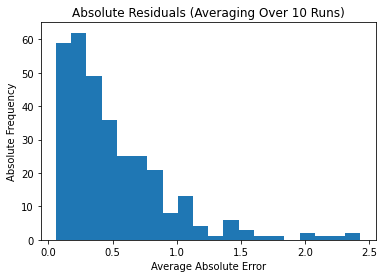

In [ ]:
abs_errors = []

for random_state in range(1, 11): # 10 runs
    # Create MLP regressor
    mlp = MLPRegressor(
        hidden_layer_sizes=(10, 10),
        activation='relu',
        early_stopping=True,
        validation_fraction=0.2,
        random_state=random_state
    )

    # Train model
    mlp.fit(X_train, y_train)

    # Predict test data
    y_pred = mlp.predict(X_test)

    # Calculate absolute error
    abs_error = abs(y_test - y_pred)
    abs_errors.append(abs_error)

# Calculate the element-wise average of the absolute errors
avg_abs_error = np.mean(abs_errors, axis=0)

# Plot the histogram of the average absolute errors
plt.hist(avg_abs_error, bins=20)
plt.title("Absolute Residuals (Averaging Over 10 Runs)")
plt.xlabel("Average Absolute Error")
plt.ylabel("Absolute Frequency")
plt.show()


### 2) [1.5v]

**Since we are in the presence of a integer regression task, a recommended trick is to round and bound estimates. Assess the impact of these operations on the MAE of the MLP learnt in previous question.**

In [ ]:
originalMAE = []
roundedMAE = []

for random_state in range(1, 11):
    
    mlp = MLPRegressor(
        hidden_layer_sizes=(10, 10),
        activation='relu',
        early_stopping=True,
        validation_fraction=0.2,
        random_state=random_state
    )

    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    
    # Round and bound estimates
    y_pred_rounded = np.round(y_pred)
    y_pred_rounded[y_pred_rounded > 10] = 10
    y_pred_rounded[y_pred_rounded < 1] = 1

    # Original MAE
    originalMAE.append(metrics.mean_absolute_error(y_test, y_pred))

    # Rounded MAE
    roundedMAE.append(metrics.mean_absolute_error(y_test, y_pred_rounded))

print("Original MAE: ", np.mean(originalMAE))
print("Rounded MAE: ", np.mean(roundedMAE))

Original MAE:  0.5097171955009514
Rounded MAE:  0.43875000000000003


**${\text{OriginalMAE:} \; 0.5097}$**

**${\text{RoundedMAE:} \; 0.4388}$**

Indeed, the post-processing of rounding and bounding the model estimates **affects substantially**  the MAE of the learnt MLP regressor. This outcome is likely due to the **better approximation of our predictions to the dataset domain**, as we know beforehand that we are working with an integer regression in the interval ${1 .. 10}$.

### 3) [1.5v]

**Similarly assess the impact on RMSE from replacing early stopping by a well-defined number of iterations in {20,50,100,200} (where one iteration corresponds to a batch).**

RMSE for 20 iterations:  1.4039789509925442
RMSE for 50 iterations:  0.7996073631460566
RMSE for 100 iterations:  0.6940361469112144
RMSE for 200 iterations:  0.6554543932216474


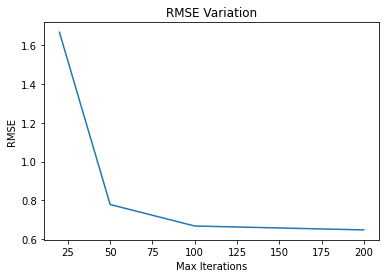

In [ ]:
rmse_errors = []
for max_iter in [20, 50, 100, 200]:
    rmses = np.array([])
    for r in range(10):
        mlp = MLPRegressor(
            hidden_layer_sizes=(10, 10),
            activation='relu',
            max_iter=max_iter,
            random_state=r+1
        )

        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        rmses = np.append(rmses, rmse)
    
    print("RMSE for", max_iter, "iterations: ", np.mean(rmses))
    rmse_errors.append(rmse)

plt.plot([20, 50, 100, 200], rmse_errors)
plt.title("RMSE Variation")
plt.xlabel("Max Iterations")
plt.ylabel("RMSE")
plt.show()


By increasing the model's maximum number of iterations from 20 to 50, we observe a **signficant drop in the RMSE loss metric** which correlates to a **substancial increase in model performance**. As we further increase this hyperparameter to 100 and 200, we find that the **performace improvements are minimal**, and concerns now focus more on the **bias-variance trade-off**, to prevent the model from overfitting.

### 4) [1.5v]

**Critically comment the results obtained in previous question, hypothesizing at least one reason why early stopping favors and/or worsens performance.**

As we allow the model to train for more than 100 iterations, the marginal improvements in training accuracy **become less significant compared to the increased risk of model overfitting**. In this context, **the early stopping criterion becomes advantageous**, as it enables us to halt training at the optimal point for **better generalization to test data**. It is crucial to find the right balance between model complexity and training duration. This practice not only enhances generalization and avoids overfitting, but also contributes to the model's efficiency and resource utilization, making it an essential technique in the realm of machine learning and neural networks.